# Part I - (Dataset Exploration Title)

## by (Martin De Pores Barindirimana)

In [1]:
import warnings

warnings.filterwarnings('ignore')

# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Investigation Overview  

I would like to analysis how the features are distributed and related with each others. The characeristics of interest are user_type, member_birth_year, member_gender, and bike_share_for_all_trip.

## Dataset Overview  

This dataset has 183412 rows and 16 columns.which includes information about how people in San Francisco shared their bike in the area system from one start station to end station. Data were collected in 2019.

### What is the structure of your dataset?

> The dataset has 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features are, user_type,	member_birth_year, member_gender, and bike_share_for_all_trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The distribution and type of each column to investigate its nature. Also, the estimated time from starting station to another.

# Data Cleaning 

In [3]:
# Copy the data frame to correct anomalies
df1 = df.copy()

In [4]:
df1 = df1.dropna()
# Testing 
df1.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [5]:
# Converting the birth_year to integer 
df1.member_birth_year = df1.member_birth_year.astype(int)

In [6]:
# Convert to proper format 
df1.start_time = pd.to_datetime(df1.start_time)
df1.end_time = pd.to_datetime(df1.end_time)

In [7]:
# Creatit the day of week from start_time and end_time
df1['days'] = df1.start_time.dt.dayofweek
df1['daye'] = df1.end_time.dt.dayofweek

In [8]:
#Days in proper format
df1.days.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)
df1.daye.replace([0,1,2,3,4,5,6],["monday","tuesday","wednesday","thursday","friday","saturday","sunday"],inplace=True)

In [9]:
# 2. Create ages
df1['age'] = df1['member_birth_year'].apply(lambda x: 2019 - x)

In [10]:
# Convert sec into minute
df1["Minute"] = round(df1.duration_sec/60,2)

In [11]:
# Removing the unnecessary variables
df1.drop(['start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude'
          , 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude',
          'bike_id','member_birth_year','start_time', 'end_time','duration_sec'], axis = 1, inplace = True)

In [12]:
# Rename the variable
df1=df1.rename(columns = {'member_gender' : 'Gender'})

In [13]:
# removing age abova 90.
df1 = df1.drop(df1[df1.age>90].index)

In [14]:
# removing gender factor
df2 = df1.drop(df1[df1.Gender=='Other'].index)

## The distribution of duration people spend ridding the bike and their age.

The pair plot showed that the age distribution by gender, in majority male were older that female. Relation between age and minute used to ride a bike from on start to end station were not linear. 

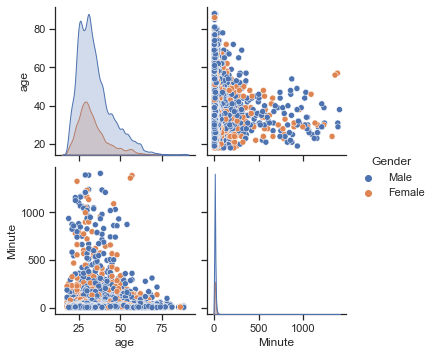

In [15]:
sns.set_theme(style="ticks")
sns.pairplot(df2, hue="Gender")

## Tripping days of the week.

Most of the people trip on thursday and tuesday. 

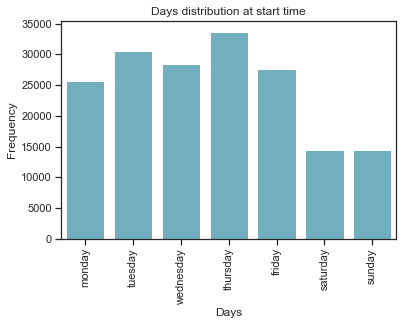

In [16]:
# Days time 
bcolor = sns.color_palette()[9]
orderd =  ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
sns.countplot(data=df1, x='days', color=bcolor, order=orderd)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.xticks(rotation= 90)
plt.title('Days distribution at start time');

## The age distribution of people.

The histogram showed that, the distribution were right skwed, where the majority of the people were between 20 and 40. Few people were old aged above 50.

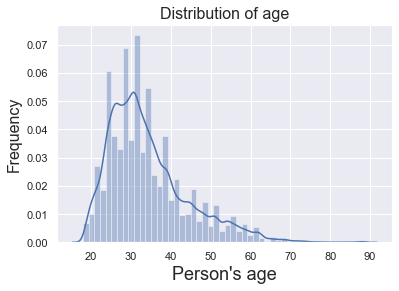

In [17]:
# Minute distribution 
sns.set_theme(style="darkgrid")
sns.distplot(df1.age , kde=True);
plt.xlabel("Person's age", fontsize=18);
plt.ylabel('Frequency', fontsize=16);
plt.title('Distribution of age', fontsize=16);

## Gender distribution

Most people who used to trip were male with high percentage. Which implies that male people were interested in tripping in daily life more than female.

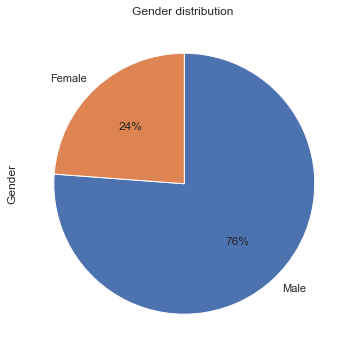

In [18]:
df2.Gender.value_counts().plot(kind = 'pie', figsize = (8,6), startangle = 90, counterclock = False, autopct='%.0f%%');
plt.title("Gender distribution ");

## Age distribution by gender

The male people in dataset were older than counterpart female.

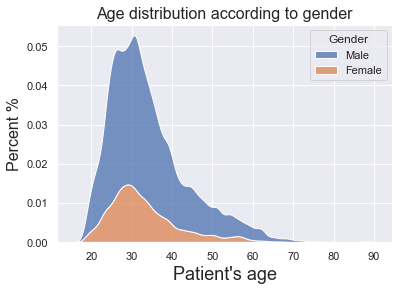

In [19]:
sns.kdeplot(data=df2, x='age',hue='Gender',multiple='stack')
plt.xlabel("Patient's age", fontsize=18)
plt.ylabel('Percent %', fontsize=16)
plt.title('Age distribution according to gender', fontsize=16);

In [20]:
def mp1(df,x1,y1):
    g = sns.barplot(
    data=df,
    x=x1, y=y1)
    x=x1.replace("_"," ")
    y=y1.replace("_"," ")
    plt.title(f'mean of {y1} by {x1}'.title(),weight="bold")
    plt.rcParams["figure.figsize"] = (8,5)

## Distribution of time people spent in ridding bike

Female participants used the bike for long time than male, while the time of trip were approximately equaly in both categories.

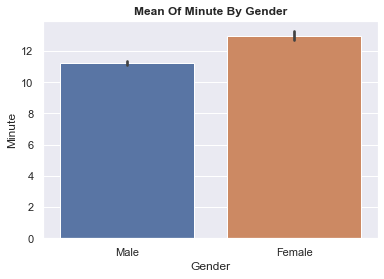

In [21]:
mp1(df2,"Gender","Minute")

## Distribution of the user type by gender

As the majority were male, the distribution were user types were different totaly different in gender, as the majority of the user were subscriber.

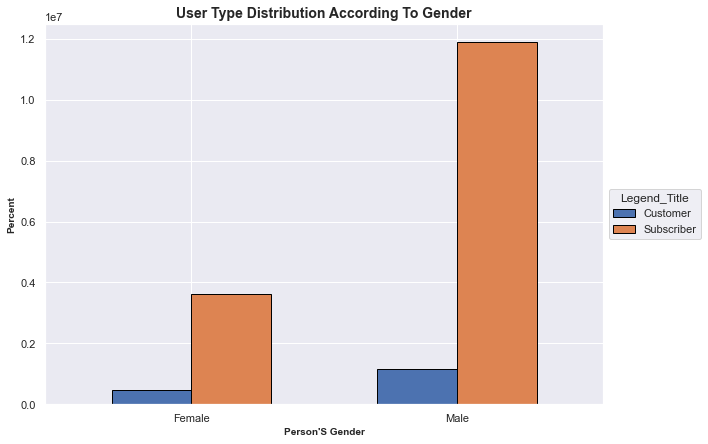

In [22]:
pd.crosstab(index=df2['Gender'], columns=df2['user_type']).mul(100).plot.bar(edgecolor='black',
                                                                figsize=[10,7],rot=0,width=0.6)
# Add title and format it
plt.title('User type distribution according to Gender'.title(), fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel("Person's gender".title(), fontsize = 10, weight = "bold")
# Add y label and format it
plt.ylabel('Percent'.title(), fontsize = 10, weight = "bold")
# (If there is a legend, you can use this) Change legend title and format it, move legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Legend_Title", title_fontsize = 12);

In [23]:
# Defining the function of plot bar chart
def mp(df,xvar,yvar,huevar):
    g = sns.catplot(
    data=df, kind="bar",
    x=xvar, y=yvar, hue=huevar,
     palette="dark", alpha=.6)
    
    g.despine(left=True)
    xvar=xvar.replace("_"," ")
    yvar=yvar.replace("_"," ")
    huevar=huevar.replace("_"," ")
    
    g.set_axis_labels(xvar, f"mean of {yvar}".title())
    g.legend.set_title(huevar)
    g.fig.set_size_inches(10,6);
    plt.title(f'mean of {yvar} by {xvar} and {huevar}'.title(),weight="bold")

## Time distribution by Gender classification in user type

In majority, female spent a lot of time on bike then male as more of them were customer.

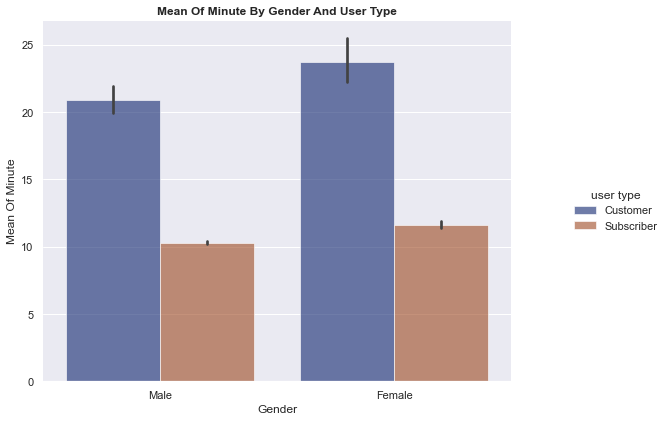

In [24]:
mp(df2,'Gender','Minute','user_type')

## The difference of people in gender on the days of the week.

It was still indicated that female were young compared to male, as also female were fewer in ridding bike in all days of the week.

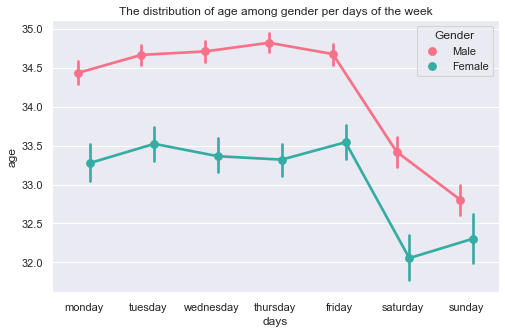

In [25]:
# Distribution plot
sns.pointplot(data = df2 , x = 'days', y = 'age', hue = "Gender",palette = 'husl', dodge = 0.2 , order = orderd)
plt.title("The distribution of age among gender per days of the week")
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


## Summary of findings

All people did the trips in San Francisco. Age of people a mojor role in decision about the type of bike to use in trip. Gender were also the factor of the time to spend in ridding bike.

## Key Insights for Presentation

The interested factor was to identify the gender distribution and effect on other factors, as gender distribution were significant different in all user case. 

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Slide_deck.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 